# The UEFA Champions League Since 2007

## Introduction

The UEFA Champions League is an annual club competition –beginning in the fall of one year and ending at the start of the summer of the following year– that takes place in Europe, in which the best teams from each leagues are invited to play. It’s arguably the most prestigious soccer tournament in the world. The question of whether or not a team will participate is determined from an array of factors, including performance in that team’s national league as well as Champions League performance during recent years; furthermore, there are two 'qualification streams' for teams that aren't invited directly to the tournament.

There’s several reasons why I chose to explore this subject. One of those reasons is that looking at the Champions League is an excellent way to examine what is going on in the world of football; it’s perhaps the best lens through which one can look at what clubs and which players are on the rise because of the fact that due to the tournament’s prestige and high monetary rewards, team managers almost always field their best players. This, combined with the fact that the tournament is comprised of essentially the best teams in the world, is strong justification for looking at this comptetion as a way to gain insight into who the world’s best are. Consider, for example, the issue of debuts: making a professional debut at the age of 17 is impressive in it’s own right, but the degree to how impressive it is depends on the league in which the player debuted. Making a debut at the age of 17 in the Greek league, for example, is not as impressive as debuting at 17 in the English Premier League (regarded as one of the most even and therefore most difficult in the world); making a debut at the age of 17 in the Champions League, on the other hand, is just about the most impressive debut there could be. It's also worth mentioning that I chose to look at the Champions League because of the richness and the completeness of the data that is available online. I scraped data off of Wikipedia and off of UEFA's Champions Leage website. I'd also considered scraping outfitter data from transfermarkt.com, but decided against it upon realizing that only the most up-to-date information on this was available, and not historical data.

Because of the richness of these data sources, my exploration can go deeper. I was able to explore variations in age, geographical origin, formation origin (where did this player learn to play football?), and see how these have changed over time. I explored questions such as: Has the average age of players in the champions league always been more or less the same? Does it fluctuate or do teams do a good job of having enough players of each age? Who plays in the Champions League? What’s the breakdown of the teams by country? What’s the breakdown of the players by country? What’s the breakdown of the teams by age? How has that changed over the years?

The data was found by scraping the two aforementioned websites, as well as sofifa.com; I used the latter to get 'skills' data to be able to compare teams skill levels. Anyone can use the scripts with which I scraped this data, although perhaps the best option to replicate this work or to simply get the data is to download it directly; it is all available in this project's github repo: https://github.com/ia2221/EDAV_Project, but is stored as namedtuples in binary format so it must be unpickled appropriately (note that to do this, the user must import pickle and have alal the relevant namedtuples defined). Plenty of examples of how to load the data will be shown in the Main Analysis section.

## Team

I worked on this project individually.

## Analysis of Data Quality

Player outfitter data would have been very exciting to explore, but is unfortunately of suboptimal quality. This kind of data was not available at all until only a few years ago, and is crucial for exploring questions such as: what’s the market distribution of athletic outfitters in soccer? Does Nike dominate? Is it Adidas? How much of the market do these two take up, and who are the players in the rest of the market? Under-Armor, New Balance, Umbro?
One piece of data that's of suboptimal quality is the outfitter data. Unfortunately, though, transfermarkt.com only reports a player's _current_
outfitter. This drastically reduces the depth with which we can carry out our analysis because of the fact that players change endorsement deals over time, and so the
distribution of outfitter market shares over time would be impossible to visualize with the available data.
Consider the case of Puma, for example; Puma has bought out a lot of players who used to be
outfitted by either Nike or Adidas (Sergio Aguero, Alexis Sanchez, etc.). Then there's also players
who've switched from Nike to Adidas or vice-versa (Fernando Torres, Zlatan Ibrahimovic, Mesut Ozil,
etc.).

In addition to this, FIFA Player data is not available at all before 2007, and only incompletely
after that. Because of this, we're limited to only focusing on the last 10 year's seasons of the
Champions League; also because of this, we have to filter some teams out from our data collection.
That is, because FIFA Player data is not available for lesser-known teams such as Levski and
Kobenhavn for all years since 2007, we're can't scrape data for all teams in the competition for
every year. Thus we're required to filter out teams; in the interest of preserving interpretability,
we filter out the same way for every year: we only consider teams that qualified to the knockout
phase of the competition.

Another thing to note regarding data quality is that a lot of the match statisitcs for many matches
are missing. For example, for match with match_code 1116314, round_code 2357, season_code 2006,
there's one goal that Chelsea scored but that doesn't have the assist attributed to anyone; this is
either evidence of missing data or implies that Michael Essien scored the goal unassisted (perhaps
he stole the ball from the other team and scored). The latter, however, is unlikely. Moreover, the
hypothesis of missing data for this match is unarguably supported by the fact that there are no pass
statistics at all for any of the players! Given that there's no way a 90 minute soccer match was
played in which no passes at all were made, we can safely conclude that there is in fact at least
_some_ missing data for this match. With this insight, we can generalize our conclusion to be that
there's a lot of match statistics missing for a lot of matches (which are listed as zeros). I unfortunately made the mistake of saving the zeros in matches like these instead of encoding them into None or 'NA', and so I'm not able to make plots to visualize the extent of this 'missingnes', as doing so would require me to check whether or not all the stored statistics for that match are zero; I'm deciding to focus my work elsewhere.

Lastly, we must also note that data such as country of birth, age, and formation (especially the latter) will be missing for many players. This is because this data is pulled from Wikipedia; there are some players for which a Wikipedia article simply does not exist, and some other players for which an article does exist, but detailed information including the formation piece is not provided. On a similar vein, there are some teams that are simply not in EA's FIFA game franchise, and consequently do not appear in sofifa.com; we do not have skill data available for these teams.

TODO: ADD SOME PLOTS HERE!!!

## Executive Summary

TODO: WRITE THIS!!!

## Main Analysis

We first try to answer some questions about the Champions League in general, and then we focus on the Champions League in the last ten years.

TODO: TRANSFER OVER STUFF FROM HW4!!!

Let's now focus on the Champions League in the last ten years.

What's the distribution of country representations by teams?

TODO: GET LISTS OF TEAMS THAT PARTICIPATED EVERY SEASON, MERGE LIST INTO SET, USE SET AS DICT KEYS, GET DICT VALUES FROM WIKIPEDIA MANUALLY. CONVERT LISTS OF TEAMS THAT PARTICIPATED EVERY SEASON INTO LISTS OF COUNTRIES THAT PARTICIPATED EVERY SEASON. PLOT MOST RECENT SEASON

How has this changed over time?

TODO: DO A GIF WITH ALL THE PLOTS FOR EVERY SEASON.

What's the distribution of country representations by players? How has that changed over time?
What's the distribution of age by players? How has that changed over time?
What's the distribution of age by countries? How has that changed over time?

TODO: SAME AS ABOVE

Let's now analyze some of the player's data.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

p_stats_df = pd.read_csv('data/csvs_for_nb/p_stats_df.csv', index_col=0)

In [22]:
def make_barplot(cats, vals, xlab, title):
    fig, ax = plt.subplots()
    
    y_pos = np.arange(len(cats))

    ax.barh(y_pos, vals, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(cats)
    ax.invert_yaxis()
    ax.set_xlabel(xlab)
    ax.set_title(title)
    ax.grid()

    plt.show()


Who earns the "4x4 Award"? (Who had the most appearances?)

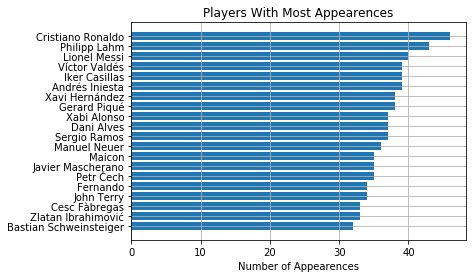

In [23]:
apps = p_stats_df.sort_values(by='apps', ascending=False)['apps'][:20]
make_barplot(apps.index, apps.values, 'Number of Appearences', 'Players With Most Appearences')

Perhaps a better way to see who earns the "4x4 Award" is by looking at who's had the most minutes.

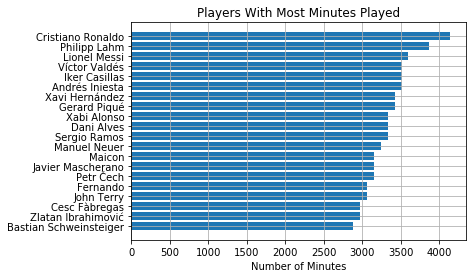

In [25]:
mins = p_stats_df.sort_values(by='minutes', ascending=False)['minutes'][:20]
make_barplot(mins.index, mins.values, 'Number of Minutes', 'Players With Most Minutes Played')

Let's see who wins the "Piggy Award". (Who had committed the most fouls?)

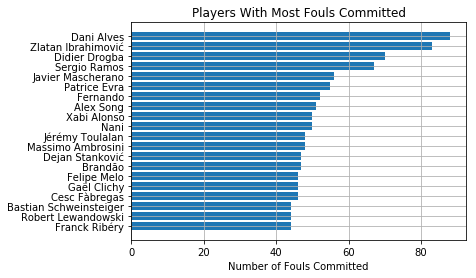

In [28]:
fouls_c = p_stats_df.sort_values(by='fouls_commited', ascending=False)['fouls_commited'][:20]
make_barplot(fouls_c.index, fouls_c.values, 'Number of Fouls Committed', 'Players With Most Fouls Committed')

## Conclusion